In [1]:
import os
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

In [27]:
file_list = [
    'logging/resnet10-40-new.log',
    'logging/resnet18-40-gmm.log',
    'logging/resnet34-40-GMM-new.log',
    'logging/resnet50-gmm.log'
#     'logging/resnet34-40-GMM-new.log',
#     'logging/resnet34-50-HOME.log',
#     'logging/resnet34-50-zscore.log'
]
true_list = []
predict_list = []
for file in file_list:
    f = open(file,'r')
    text = f.read()
    f.close()
    last_line = re.findall(r'true:(.+)\n',text)
    match = re.search(r'(.+)predict:(.+)', last_line[-1])
    true, predict = eval(match.group(1)), eval(match.group(2))
    true_list.append(true)
    predict_list.append(predict)
    p_value = pearsonr(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2 = r2_score(true,predict)
    mae = mean_absolute_error(true,predict)
    print(file,'pearsonr',round(p_value[0],3), 'rmse',round(rmse,3),'r2', round(r2,3), 'mae',round(mae,3))
    print(round(mae,3),'&', round(p_value[0],3),'&', round(r2,3),'&',round(rmse,3))

logging/resnet10-40-new.log pearsonr 0.913 rmse 7.23 r2 0.83 mae 4.895
4.895 & 0.913 & 0.83 & 7.23
logging/resnet18-40-gmm.log pearsonr 0.93 rmse 6.311 r2 0.865 mae 4.387
4.387 & 0.93 & 0.865 & 6.311
logging/resnet34-40-GMM-new.log pearsonr 0.949 rmse 5.841 r2 0.897 mae 4.193
4.193 & 0.949 & 0.897 & 5.841
logging/resnet50-gmm.log pearsonr 0.212 rmse 20.187 r2 -0.22 mae 14.509
14.509 & 0.212 & -0.22 & 20.187


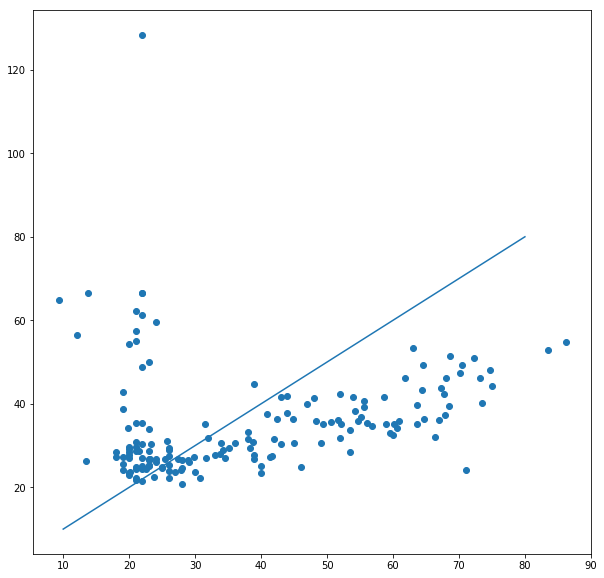

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(true_list[-1], predict_list[-1])
plt.plot(np.linspace(10,80,100),np.linspace(10,80,100))

In [29]:
def plot(*file_list):
    for file_name in file_list:
        f = open(file_name)
        text = f.read()
        f.close()
        training_losses = [float(each) for each in re.findall(r'training loss (\d+\.\d+)',text)]
        test_losseses = [float(each) for each in re.findall(r'Test loss (\d+\.\d+)',text)]
        plt.plot(training_losses, label=file_name+' training_loss')
        plt.plot(test_losseses, label=file_name+' test_loss')
        plt.legend()
    plt.show()

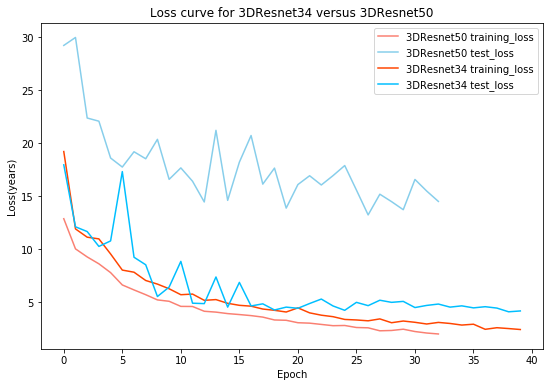

In [41]:
plt.figure(figsize=(9,6))
plt.title('Loss curve for 3DResnet34 versus 3DResnet50')
file_name = 'logging/resnet50-gmm.log'
f = open(file_name)
text = f.read()
f.close()
training_losses = [float(each) for each in re.findall(r'training loss (\d+\.\d+)',text)]
test_losseses = [float(each) for each in re.findall(r'Test loss (\d+\.\d+)',text)]
plt.plot(training_losses, label='3DResnet50 training_loss',c='salmon')
plt.plot(test_losseses, label='3DResnet50 test_loss',c='skyblue')
file_name = 'logging/resnet34-40-GMM-new.log'
f = open(file_name)
text = f.read()
f.close()
training_losses = [float(each) for each in re.findall(r'training loss (\d+\.\d+)',text)]
test_losseses = [float(each) for each in re.findall(r'Test loss (\d+\.\d+)',text)]
plt.plot(training_losses, label='3DResnet34 training_loss',c='orangered')
plt.plot(test_losseses, label='3DResnet34 test_loss',c='deepskyblue')
plt.xlabel('Epoch')
plt.ylabel('Loss(years)')
plt.legend()